# Introduction

The entertainment industry, particularly the film sector, invests significant resources in producing movies. Therefore, there is a need for a predictive model that utilize various features to estimate the potential popularity of a movie to assist in making informed decisions regarding resource allocation, marketing strategies, and distribution plans.

Our motivation in developing a predictive model for movie popularity arises with the aim to accurately predict a movie's success before its release, which then contributes to the success of entertainment companies and industry.



<img src="image-20240419-221828.png" width="" align="" />

# Table of Contents

- Import Libraries
- Data Analysis
- Data Cleaning
- Data Preparation & Visualization
- Machine Learning
  - Pre-Model Fitting
  - Model Building
  - Model Comparison
  - Post-Model Outlier Removal
- Feature Importance
- Conclusion



# Import Libraries

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [ ]:
#import df1
df1 = pd.read_csv('movies_metadata.csv')

/tmp/ipykernel_82/278039503.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('movies_metadata.csv')


In [ ]:
df1.head()

adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   
3                                   NaN  31357  tt0114885                en   
4                                   NaN  11862  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  ... release_date  \
0  Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1  When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2  A family wedding reignites the ancient feud be...  ...   1995-12-22   
3  Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4  Just when George Banks has recovered from his ...  ...   1995-02-10   

       revenue runtime                                   spoken_languages  \
0  373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0   104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2          0.0   101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3   81452156.0   127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4   76578911.0   106.0           [{'iso_639_1': 'en', 'name': 'English'}]   

     status                                            tagline  \
0  Released                                                NaN   
1  Released          Roll the dice and unleash the excitement!   
2  Released  Still Yelling. Still Fighting. Still Ready for...   
3  Released  Friends are the people who let you be yourself...   
4  Released  Just When His World Is Back To Normal... He's ...   

                         title  video vote_average vote_count  
0                    Toy Story  False          7.7     5415.0  
1                      Jumanji  False          6.9     2413.0  
2             Grumpier Old Men  False          6.5       92.0  
3            Waiting to Exhale  False          6.1       34.0  
4  Father of the Bride Part II  False          5.7      173.0  

[5 rows x 24 columns]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

<b>About the dataset:</b>

- budget: The budget in which the movie was made.
- genre: The genre of the movie, Action, Comedy ,Thriller etc.
- homepage: A link to the homepage of the movie.
- id: This is infact the movie_id as in the first dataset.
- keywords: The keywords or tags related to the movie.
- original_language: The language in which the movie was made.
- original_title: The title of the movie before translation or adaptation.
- overview: A brief description of the movie.
- popularity: A numeric quantity specifying the movie popularity.
- production_companies: The production house of the movie.
- production_countries: The country in which it was produced.
- release_date: The date on which it was released.
- revenue: The worldwide revenue generated by the movie.
- runtime: The running time of the movie in minutes.
- status: "Released" or "Rumored".
- tagline: Movie's tagline.
- title: Title of the movie.
- vote_average: average ratings the movie recieved.
- vote_count: the count of votes recieved.

# Data Analysis

Variables that consist of text data and not being directly related to the popularity have been dropped.

In [ ]:
#create df2 with only the relevant columns
df2 = pd.DataFrame(data=df1, columns=['id', 'budget', 'genres', 'popularity',
'revenue', 'runtime', 'vote_average', 'vote_count'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            45466 non-null  object 
 1   budget        45466 non-null  object 
 2   genres        45466 non-null  object 
 3   popularity    45461 non-null  object 
 4   revenue       45460 non-null  float64
 5   runtime       45203 non-null  float64
 6   vote_average  45460 non-null  float64
 7   vote_count    45460 non-null  float64
dtypes: float64(4), object(4)
memory usage: 2.8+ MB


id is use to compare duplicate rows, it will be removed after the data cleaning

In [ ]:
df2.describe()

revenue       runtime  vote_average    vote_count
count  4.546000e+04  45203.000000  45460.000000  45460.000000
mean   1.120935e+07     94.128199      5.618207    109.897338
std    6.433225e+07     38.407810      1.924216    491.310374
min    0.000000e+00      0.000000      0.000000      0.000000
25%    0.000000e+00     85.000000      5.000000      3.000000
50%    0.000000e+00     95.000000      6.000000     10.000000
75%    0.000000e+00    107.000000      6.800000     34.000000
max    2.787965e+09   1256.000000     10.000000  14075.000000

<b> Analysis of the dataset above: </b>
* There are `8` variables/columns and `45466` samples/rows in the dataset.  
* The response variable seems to be `popularity`. The 'id' serves as a unique identifier for the movie while the remaining 6 are most likely predictors.
* There are `4` variables identified as `float64` by default, and it seems they are indeed Numeric.     
* There are `4` variables identified as `object` by default. Among them, only the 'genre' variable is categorical. The 'id' which is the unique identifier for the movie and can be retained as an object datatype. However, the 'budget' and 'popularity' variables, which are numeric, should be converted to 'float64'.   
* There are columns that contain null values: 
    * popularity
    * revenue
    * runtime
    * vote_average
    * vote_count
* The minimum 'runtime' in the dataset is 0, which does not make any sense.
* The minimum 'vote_count' for the dataset is 0, potentially influencing the resultant 'vote_average' to be 0 as well.

# Data Cleaning

<b> Data Cleaning Setup: </b>

1. Datatype Conversion
    Since the 'budget', 'id' and 'popularity' columns contain numeric values, they will be converted to a float type from their current object type.

2. Handling Null Values

    Rows containing null values across the columns will be removed since they amount to a few rows compared to the large dataset we are working with.

3. Handling Duplicates

    Duplicates in the dataset can skew analysis results. To ensure data integrity, we will use the 'id' column as the unique identifier to identify and remove duplicated movie entries.

4. Remove Irrelevant Information
    To streamline the dataset for ML modeling, irrelevant information will be extracted from certain columns. In the 'Genre' column, only the 'name' values will be kept. Any values that are lacking meaningful insight, such as a movie with a runtime of 0, should be discarded to prevent inaccurate predictions due to their impact on the response variable.

## Datatype Conversion

In [ ]:
# Convert 'popularity' column to float
df2['popularity'] = pd.to_numeric(df2['popularity'], errors='coerce')

# Convert 'budget' column to float
df2['budget'] = pd.to_numeric(df2['budget'], errors='coerce')

# Convert 'id' column to float
df2['id'] = pd.to_numeric(df2['id'], errors='coerce')


df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            45463 non-null  float64
 1   budget        45463 non-null  float64
 2   genres        45466 non-null  object 
 3   popularity    45460 non-null  float64
 4   revenue       45460 non-null  float64
 5   runtime       45203 non-null  float64
 6   vote_average  45460 non-null  float64
 7   vote_count    45460 non-null  float64
dtypes: float64(7), object(1)
memory usage: 2.8+ MB


## Handling Null Values

In [ ]:
#remove null values
print("Shape before removing null values: ", df2.shape)

# Remove rows with null values
df2 = df2.dropna()

# Print info to verify changes
print("Shape after removing null values: ", df2.shape)
print(df2.info())

Shape before removing null values:  (45466, 8)
Shape after removing null values:  (45203, 8)
<class 'pandas.core.frame.DataFrame'>
Index: 45203 entries, 0 to 45465
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            45203 non-null  float64
 1   budget        45203 non-null  float64
 2   genres        45203 non-null  object 
 3   popularity    45203 non-null  float64
 4   revenue       45203 non-null  float64
 5   runtime       45203 non-null  float64
 6   vote_average  45203 non-null  float64
 7   vote_count    45203 non-null  float64
dtypes: float64(7), object(1)
memory usage: 3.1+ MB
None


## Handling Duplicates

In [ ]:
# Grouping by 'id' and applying a lambda function to concatenate duplicated rows
duplicates_grouped = df2[df2.duplicated(subset=['id'], keep=False)].groupby('id').apply(lambda x: x.to_string(index
=False))

# Print out the duplicated rows
print("Duplicate Rows:")
for id, rows in duplicates_grouped.items():
    print(rows, '\n')

Duplicate Rows:
    id     budget                                                                                                                                                     genres  popularity    revenue  runtime  vote_average  vote_count
4912.0 30000000.0 [{'id': 35, 'name': 'Comedy'}, {'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}, {'id': 53, 'name': 'Thriller'}]   11.331072 33013805.0    113.0           6.6       281.0
4912.0 30000000.0 [{'id': 35, 'name': 'Comedy'}, {'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}, {'id': 53, 'name': 'Thriller'}]    7.645827 33013805.0    113.0           6.6       281.0 

    id  budget                                                                                     genres  popularity  revenue  runtime  vote_average  vote_count
5511.0     0.0 [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Thriller'}]    9.091288  39481.0 

In [ ]:
# Print shape before removing duplicates
print("\nShape before removing duplicates:", df2.shape)

# Remove duplicates based on 'id' column
# df2_no_duplicates = df2.drop_duplicates(subset=['id'])
df2 = df2.drop_duplicates(subset=['id'])

# Print shape after removing duplicates
print("Shape after removing duplicates:", df2.shape)


Shape before removing duplicates: (45203, 8)
Shape after removing duplicates: (45173, 8)


30 rows are removed due to presence of 29 duplicated rows including one of it being duplicated twice. 

## Remove Irrelevant Information

In [ ]:
import json

# Convert string representation to list of dictionaries
df2['genres'] = df2['genres'].apply(lambda x: json.loads(x.replace("'", '"')))

# Extracting genre names for all rows
genre_names_all = df2['genres'].apply(lambda x: [genre['name'] for genre in x])

# Replace 'genres' column with 'genre_names_all'
df2['genres'] = genre_names_all
df2.head()

id      budget                        genres  popularity      revenue  \
0    862.0  30000000.0   [Animation, Comedy, Family]   21.946943  373554033.0   
1   8844.0  65000000.0  [Adventure, Fantasy, Family]   17.015539  262797249.0   
2  15602.0         0.0             [Romance, Comedy]   11.712900          0.0   
3  31357.0  16000000.0      [Comedy, Drama, Romance]    3.859495   81452156.0   
4  11862.0         0.0                      [Comedy]    8.387519   76578911.0   

   runtime  vote_average  vote_count  
0     81.0           7.7      5415.0  
1    104.0           6.9      2413.0  
2    101.0           6.5        92.0  
3    127.0           6.1        34.0  
4    106.0           5.7       173.0

In [ ]:
# Drop movies with a runtime of zero
df2 = df2[df2['runtime'] != 0.0]

Movies with runtime of 0 should be dropped to maintain data integrity. Such entries are likely errors or missing information, and including them can distort analysis and model predictions.

In [ ]:
# Print shape after cleaning
print("Shape after after cleaning:", df2.shape)

df2.describe()

Shape after after cleaning: (43615, 8)


id        budget    popularity       revenue       runtime  \
count   43615.000000  4.361500e+04  43615.000000  4.361500e+04  43615.000000   
mean   105085.576155  4.396077e+06      3.017153  1.167525e+07     97.486576   
std    110869.536495  1.776587e+07      6.099869  6.563536e+07     34.650931   
min         2.000000  0.000000e+00      0.000000  0.000000e+00      1.000000   
25%     25508.500000  0.000000e+00      0.419442  0.000000e+00     86.000000   
50%     57089.000000  0.000000e+00      1.192451  0.000000e+00     95.000000   
75%    147695.000000  0.000000e+00      3.909529  0.000000e+00    107.000000   
max    469172.000000  3.800000e+08    547.488298  2.787965e+09   1256.000000   

       vote_average    vote_count  
count  43615.000000  43615.000000  
mean       5.671950    114.238977  
std        1.855833    501.112665  
min        0.000000      0.000000  
25%        5.000000      4.000000  
50%        6.000000     10.000000  
75%        6.800000     36.000000  
max       10.000000  14075.000000

# Data Preparation & Visualization

In [ ]:
# Numeric Predictors
df2[['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']].describe()

budget    popularity       revenue       runtime  vote_average  \
count  4.361500e+04  43615.000000  4.361500e+04  43615.000000  43615.000000   
mean   4.396077e+06      3.017153  1.167525e+07     97.486576      5.671950   
std    1.776587e+07      6.099869  6.563536e+07     34.650931      1.855833   
min    0.000000e+00      0.000000  0.000000e+00      1.000000      0.000000   
25%    0.000000e+00      0.419442  0.000000e+00     86.000000      5.000000   
50%    0.000000e+00      1.192451  0.000000e+00     95.000000      6.000000   
75%    0.000000e+00      3.909529  0.000000e+00    107.000000      6.800000   
max    3.800000e+08    547.488298  2.787965e+09   1256.000000     10.000000   

         vote_count  
count  43615.000000  
mean     114.238977  
std      501.112665  
min        0.000000  
25%        4.000000  
50%       10.000000  
75%       36.000000  
max    14075.000000

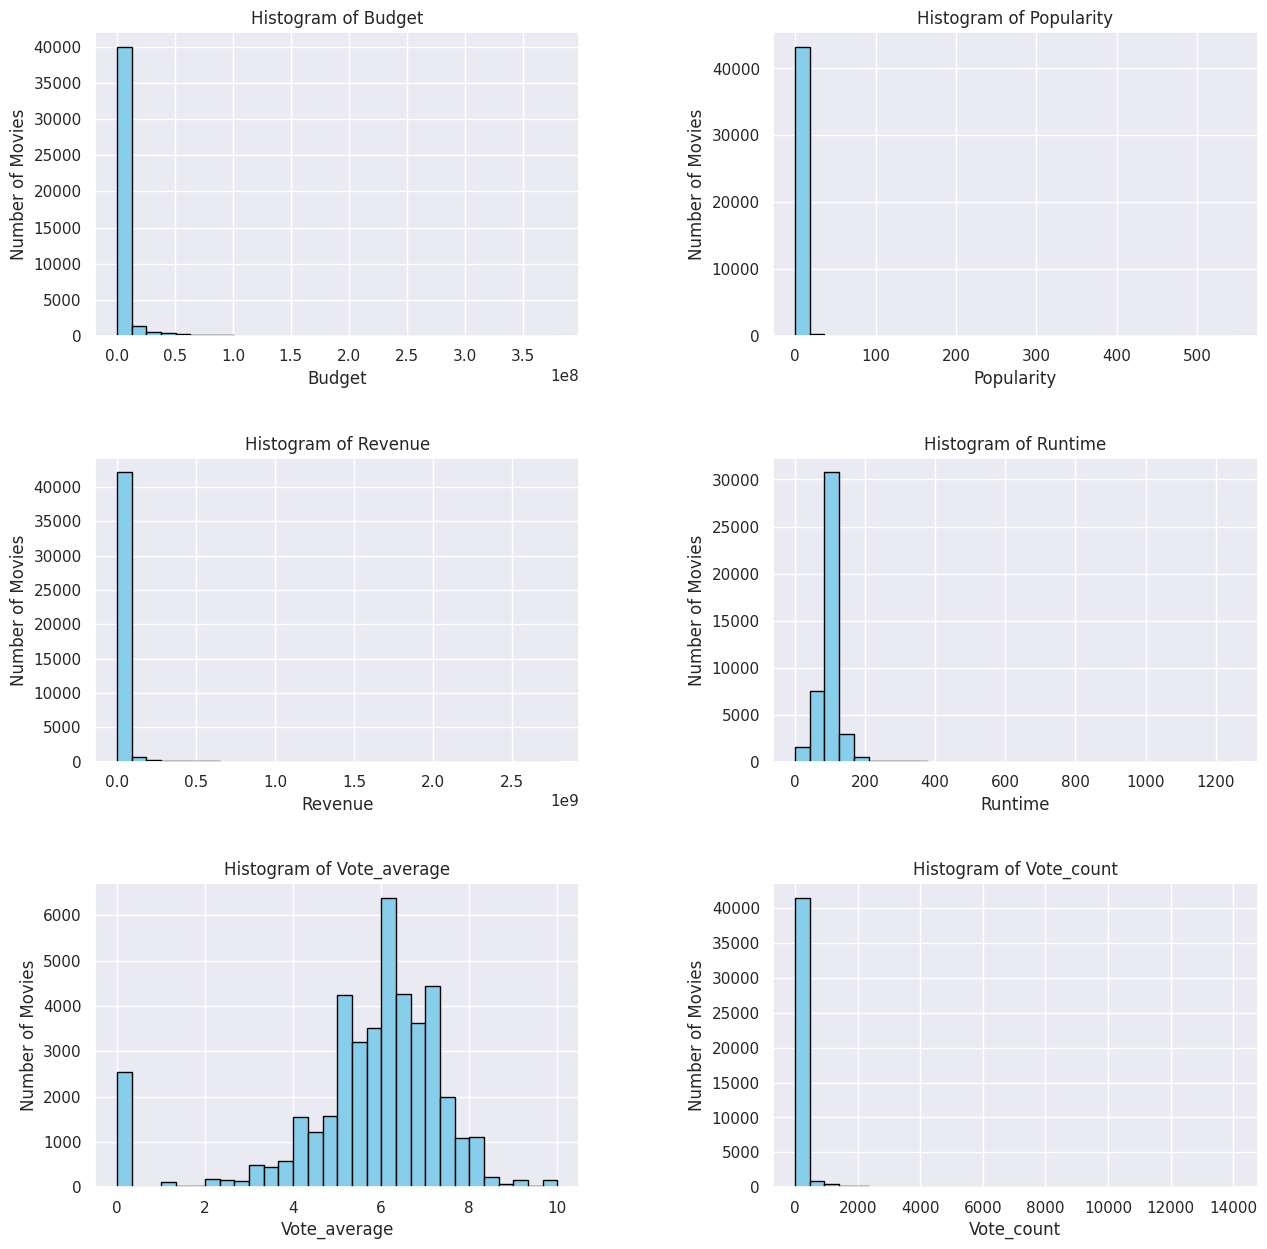

In [ ]:
# Define the columns for plotting
columns_to_plot = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']

# Plot histograms
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for ax, column in zip(axes.flatten(), columns_to_plot):
    # Plot histogram
    ax.hist(df2[column], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of {column.capitalize()}')
    ax.set_xlabel(column.capitalize())
    ax.set_ylabel('Number of Movies')
    ax.grid(True)

plt.show()

Before doing regression, we need to make sure the data is normalize in order to avoid the vanishing gradient problem during the training phase.

We have to normalize the plot with skewness which has large difference with value of 0±1. 
(Skewness=0 means normal distribution)

In [ ]:
from scipy.stats import skew

# Calculate skewness
skewness_before = {}
for column in columns_to_plot:
    skewness_before[column] = skew(df2[column])

# Show skewness
print("Skewness before normalization:")
for column, value in skewness_before.items():
    print(f"{column.capitalize()}: {value:.2f}")

Skewness before normalization:
Budget: 6.98
Popularity: 29.00
Revenue: 12.02
Runtime: 6.73
Vote_average: -1.56
Vote_count: 10.24


Need to normalize all column except 'Vote_average' based on skewness. 

In [ ]:
# Check for zero values in each column
zero_values = df2.eq(0).sum()

# Print columns with zero values
print("Columns with zero values:")
print(zero_values[zero_values > 0])

Columns with zero values:
budget          34806
popularity         42
revenue         36244
vote_average     2540
vote_count       2452
dtype: int64


These columns contain zero value. We cannot use logarithm to normalize the data. 

Use log1p instead, i.e., it calculates log(1 + x) for each element. This function is useful when we want to avoid numerical issues, such as underflow, that can occur when x is very close to zero. It is particularly handy when dealing with small values or when working with data that may contain zeros.

In [ ]:
df2_normalized = df2.copy()

# Normalize data
df2_normalized['budget'] = np.log1p(df2_normalized['budget'])
df2_normalized['revenue'] = np.log1p(df2_normalized['revenue'])
df2_normalized['popularity'] = np.log1p(df2_normalized['popularity'])
df2_normalized['vote_count'] = np.log1p(df2_normalized['vote_count'])

df2_normalized['runtime'] = np.log1p(df2_normalized['runtime'])

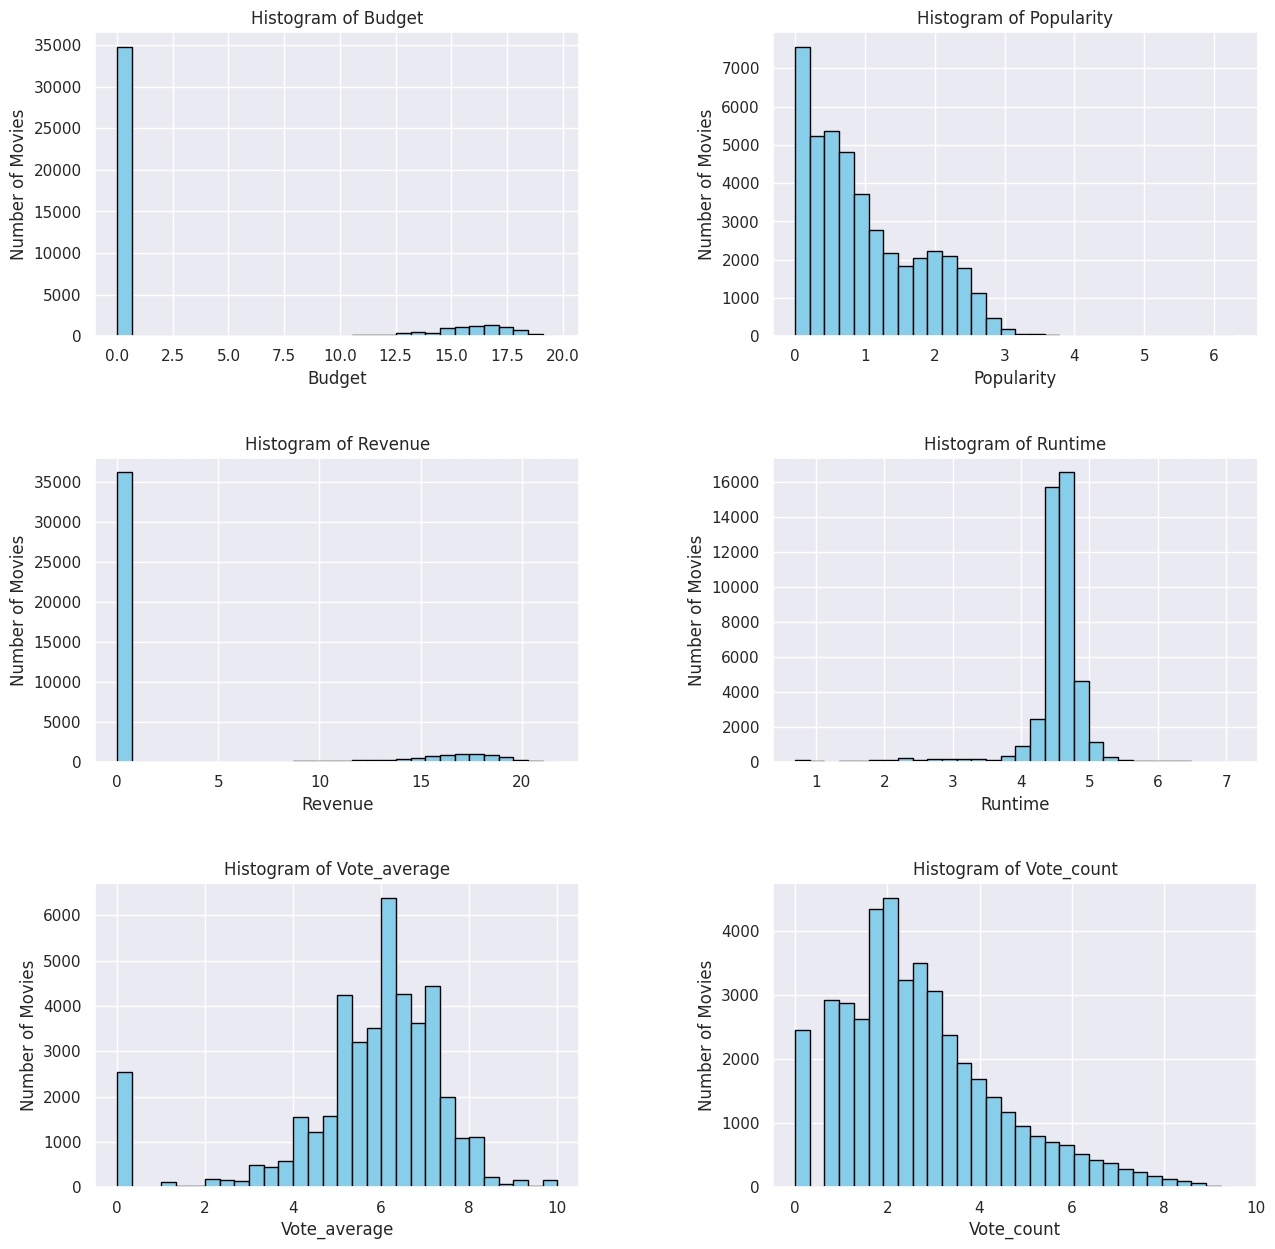

In [ ]:
# Define the columns for plotting
columns_to_plot = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']

# Plot histograms
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for ax, column in zip(axes.flatten(), columns_to_plot):
    # Plot histogram
    ax.hist(df2_normalized[column], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of {column.capitalize()}')
    ax.set_xlabel(column.capitalize())
    ax.set_ylabel('Number of Movies')
    ax.grid(True)

plt.show()

In [ ]:
# Calculate skewness
skewness_after = {}
for column in columns_to_plot:
    skewness_after[column] = skew(df2_normalized[column])

# Show skewness
print("Skewness after normalization:")
for column, value in skewness_after.items():
    print(f"{column.capitalize()}: {value:.2f}")

Skewness after normalization:
Budget: 1.58
Popularity: 0.76
Revenue: 1.90
Runtime: -4.05
Vote_average: -1.56
Vote_count: 0.84


In [ ]:
# List of genres in dataset

whole_of_genre_names = []

for genres_str in df2['genres']:
    genres_list = genres_str

    for genre_dict in genres_list:
        if genre_dict not in whole_of_genre_names:
            whole_of_genre_names.append(genre_dict)

whole_of_genre_names = sorted(whole_of_genre_names)
print(whole_of_genre_names)

['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']


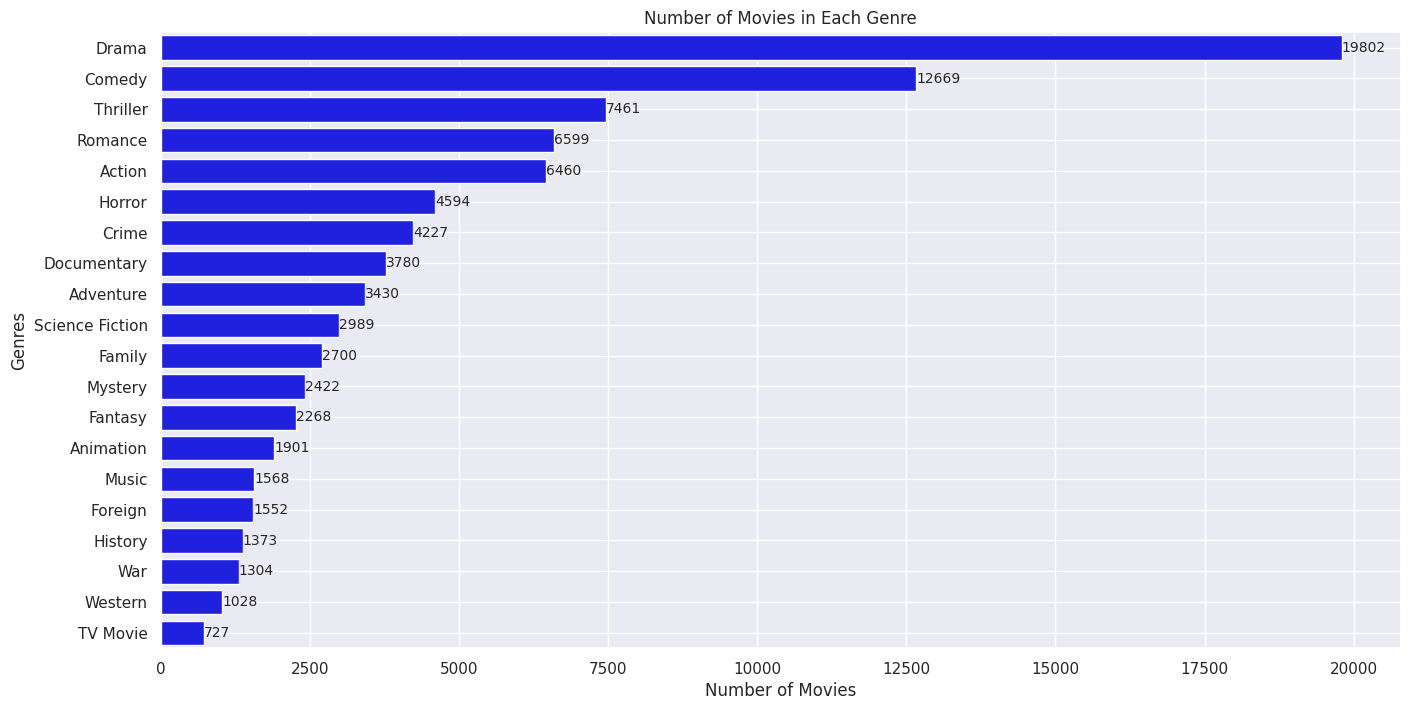

In [ ]:
# Genre distribution and the number of movies (bar plot)

genre_df = pd.DataFrame(data=df2, columns=['genres', 'id'])
genre_list = genre_df['genres'].explode()
genre_counts = genre_list.value_counts()

plt.figure(figsize=(16, 8))
sb.barplot(x=genre_counts.values, y=genre_counts.index, color='blue')

for index, value in enumerate(genre_counts.values):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)

plt.title('Number of Movies in Each Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.grid(True)
plt.show()

The bar plot above describes the genre distribution in the dataset, revealing drama and comedy as dominant genres, possibly indicating strong audience appeal. Thriller, romance, and action also feature prominently in the top five, suggesting market demand or evolving viewer preferences. Conversely, genres with fewer entries, like TV movie, represent niche areas or lesser-explored genres. 

This distribution offers insights into audience preferences, industry trends, and potential marketing strategies, providing valuable context for understanding the film industry.

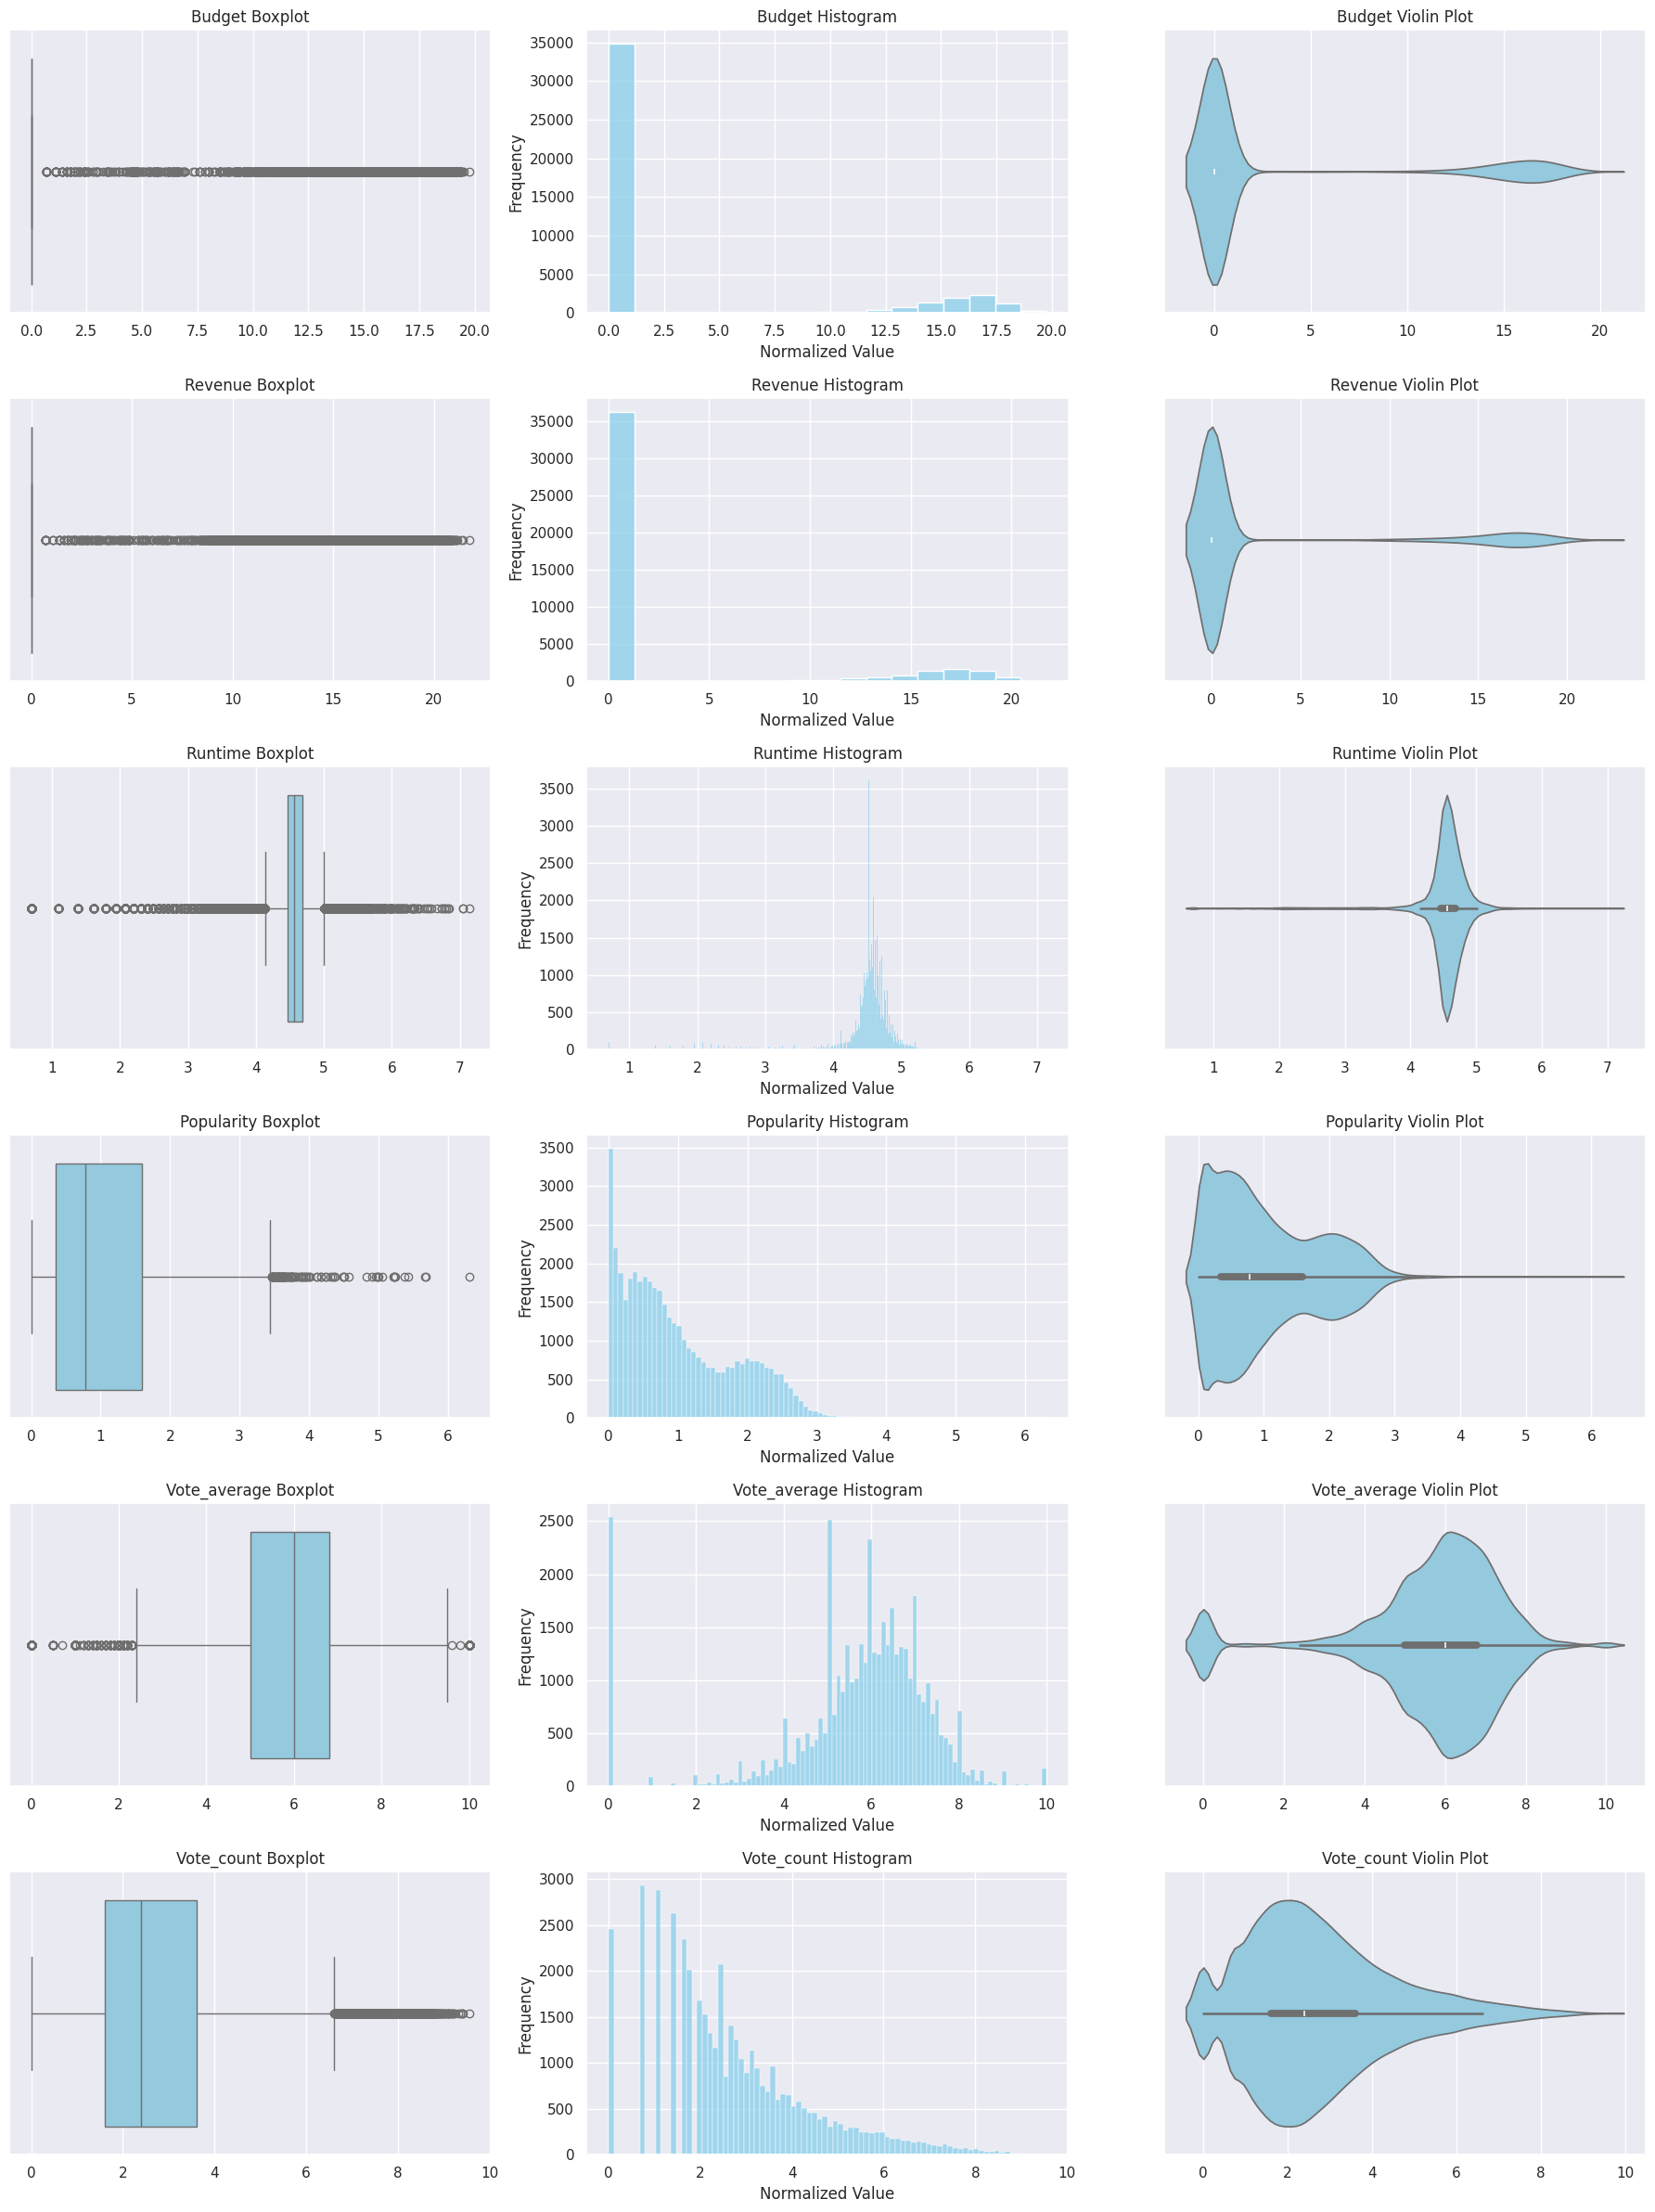

In [ ]:
# Create a figure with subplots
f, axes = plt.subplots(6, 3, figsize=(18, 24))

# Define the columns to plot
columns_to_plot = ['budget', 'revenue', 'runtime', 'popularity', 'vote_average', 'vote_count']

# Iterate through each variable and draw the distributions
for i, var in enumerate(columns_to_plot):
    # Boxplot
    sb.boxplot(data=df2_normalized[var], orient="h", ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'{var.capitalize()} Boxplot')
    axes[i, 0].set_xlabel('')

    # Histogram
    sb.histplot(data=df2_normalized[var], ax=axes[i, 1], color='skyblue')
    axes[i, 1].set_title(f'{var.capitalize()} Histogram')
    axes[i, 1].set_xlabel('Normalized Value')
    axes[i, 1].set_ylabel('Frequency')

    # Violin plot
    sb.violinplot(data=df2_normalized[var], orient="h", ax=axes[i, 2], color='skyblue')
    axes[i, 2].set_title(f'{var.capitalize()} Violin Plot')
    axes[i, 2].set_xlabel('')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

These plots shows the distribution of all numeric features in the dataset.

We can also see the distribution of popularity from here. From violin, we can see that it is significantly positively skewed. The majority of movies have extremely low popularity scores, with outliers scattered throughout. Most outliers fall within the 0-3 range, indicating moderate popularity, while others range from 3-5, suggesting higher popularity. Notably, one outlier surpasses a popularity score of 6.

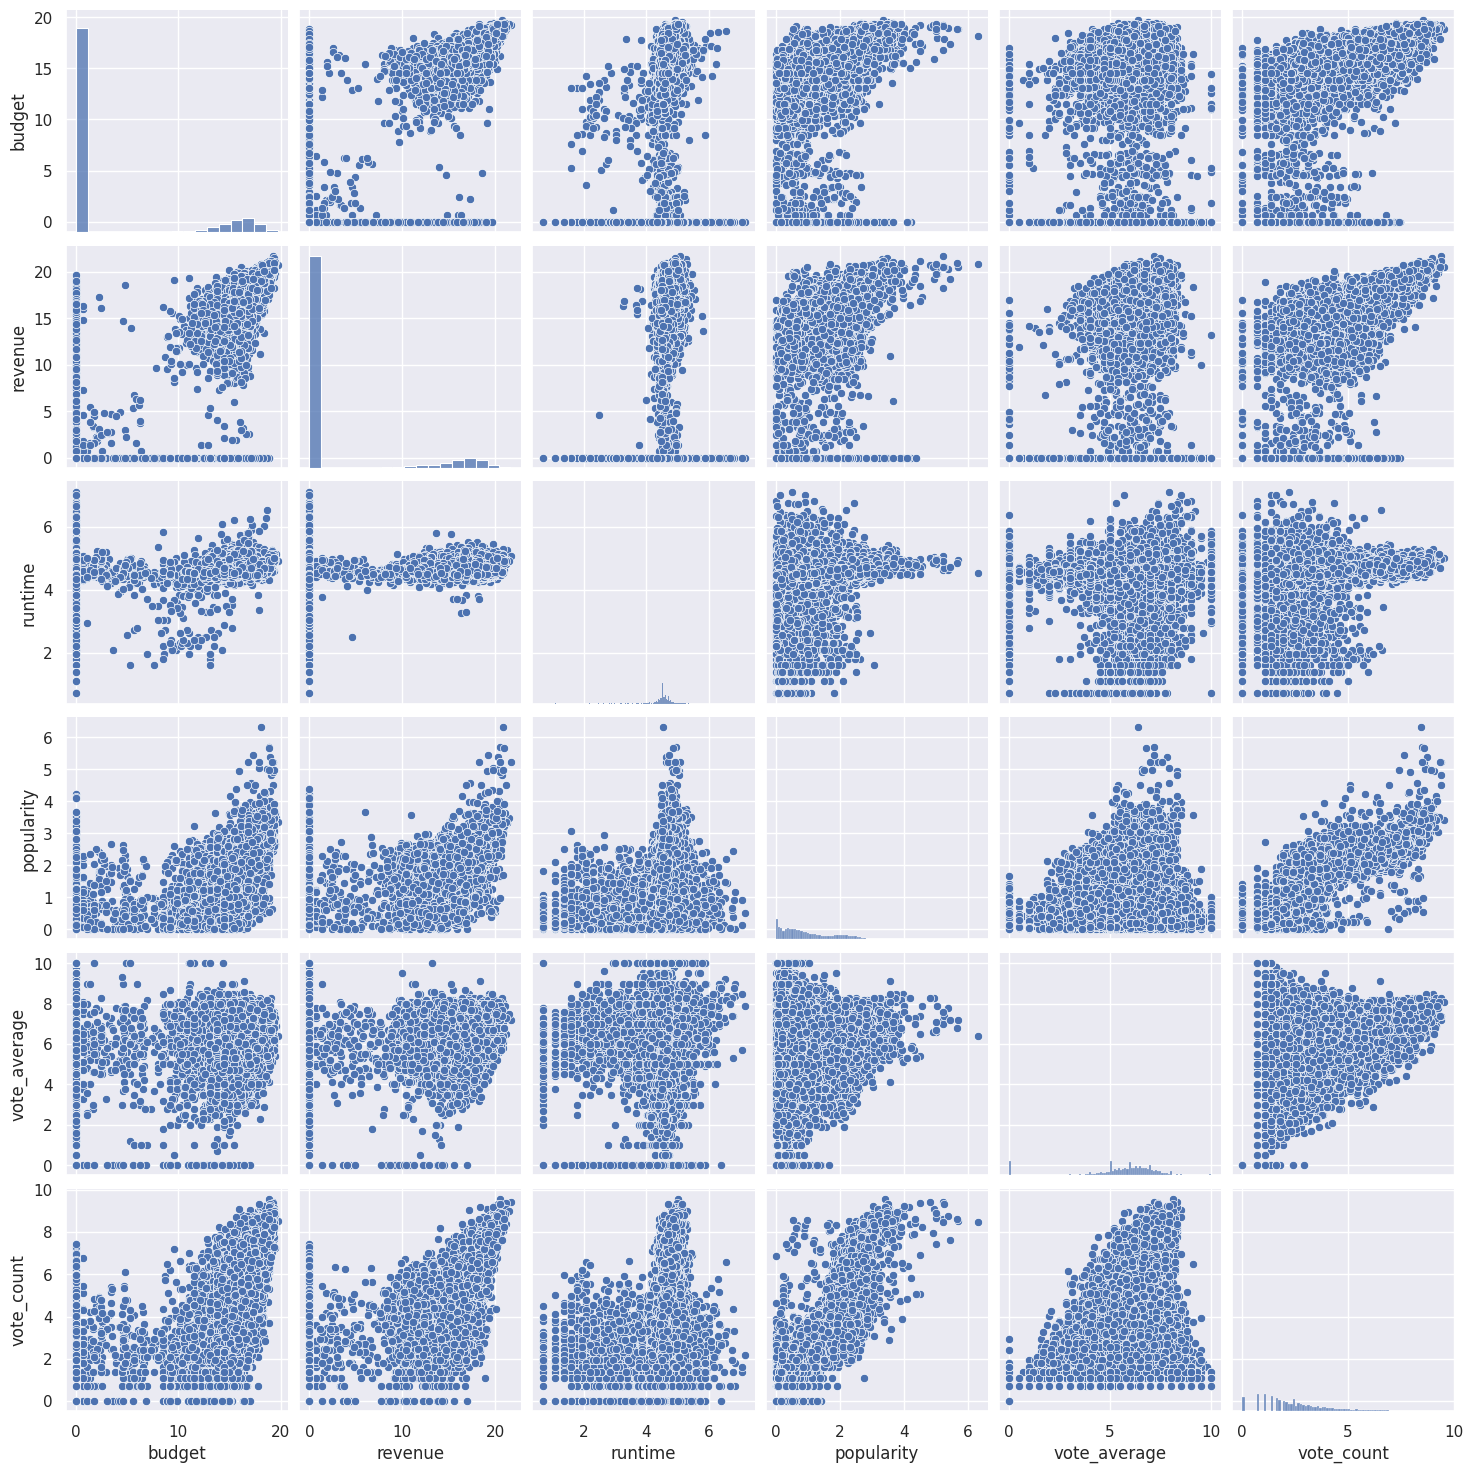

In [ ]:
# Define the columns to include
columns_to_include = ['budget', 'revenue', 'runtime', 'popularity', 'vote_average', 'vote_count']

# Select the desired columns from the DataFrame
df2_selected = df2_normalized[columns_to_include]

# Draw pairs of variables against one another
sb.pairplot(data=df2_selected)

# Show the plot
plt.show()

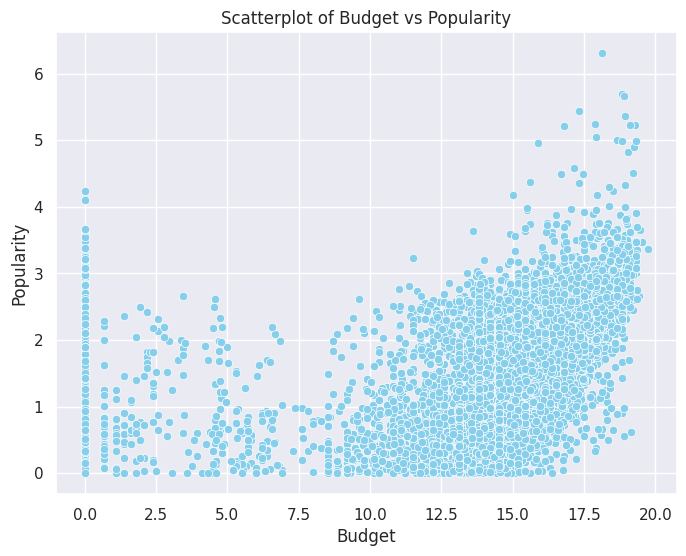

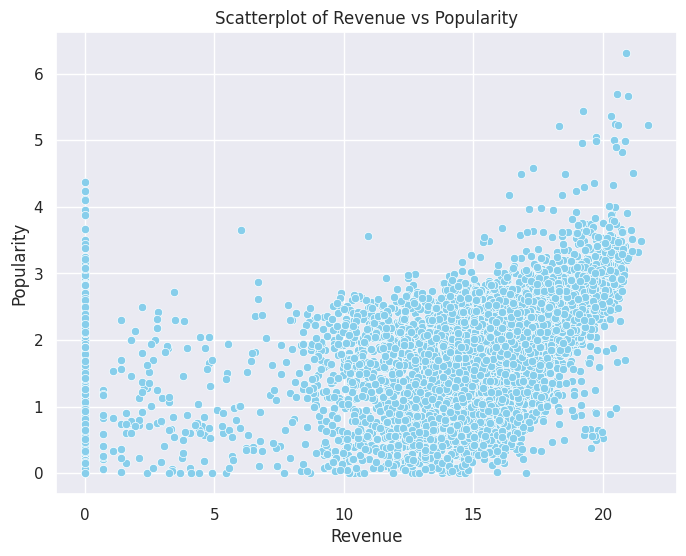

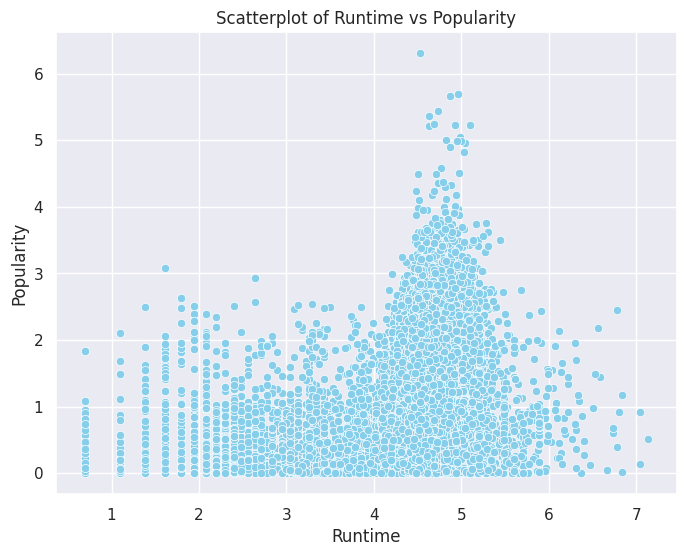

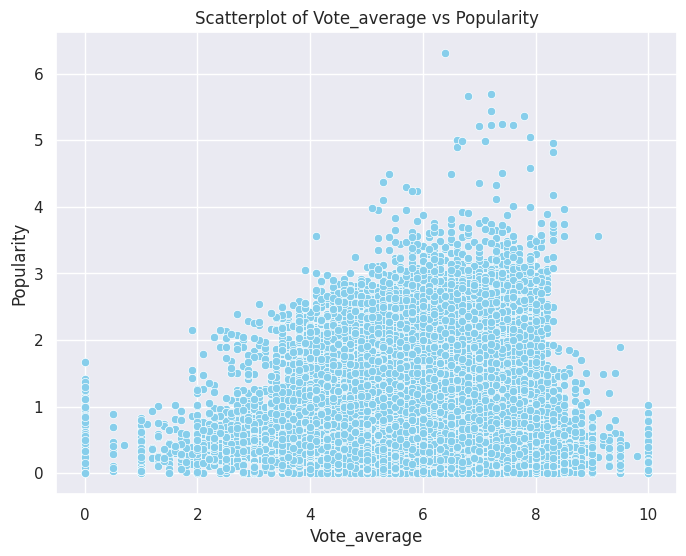

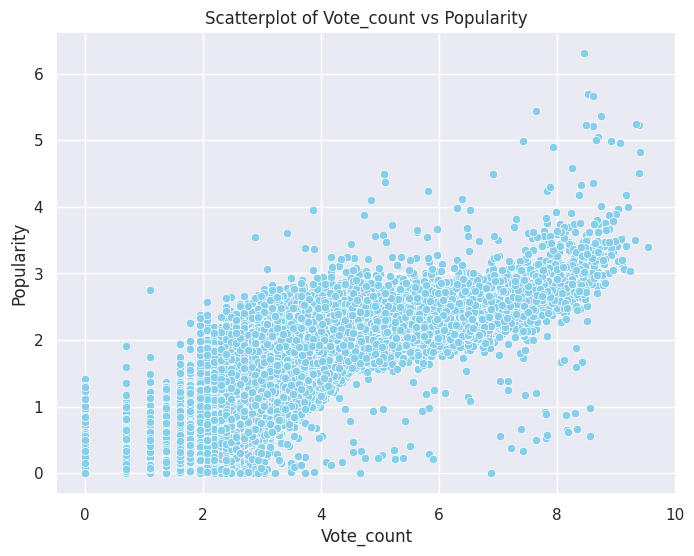

In [ ]:
# Plotting ScatterPlots of Popularity with respect to other Independent Variables

# Select the variables of interest
x_variables_of_interest = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count', 'popularity']

# Create scatterplots
for var in x_variables_of_interest[:-1]:  # Exclude 'popularity'
    plt.figure(figsize=(8, 6))
    sb.scatterplot(data=df2_normalized, x=var, y='popularity', color='skyblue')
    plt.title(f'Scatterplot of {var.capitalize()} vs Popularity')
    plt.xlabel(var.capitalize())
    plt.ylabel('Popularity')
    plt.grid(True)
    plt.show()

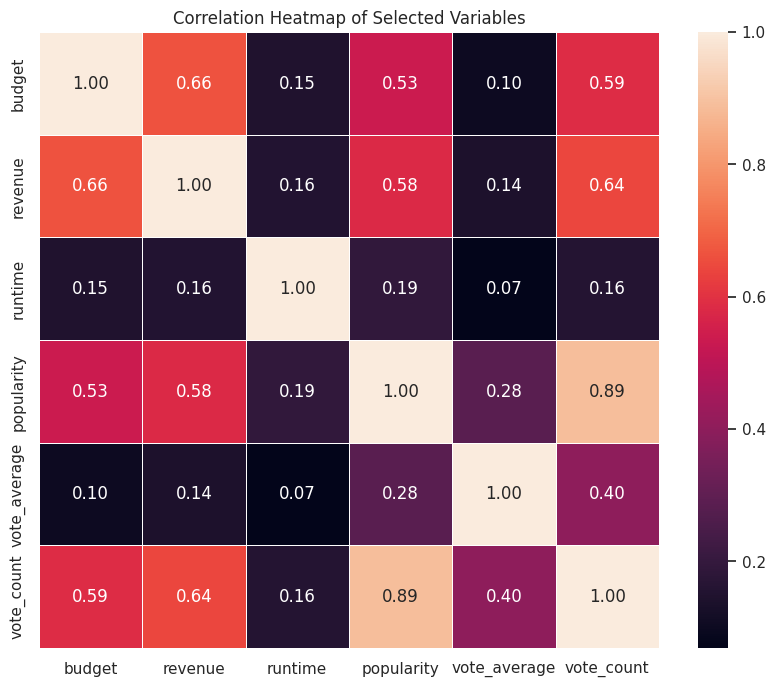

In [ ]:
# Create a correlation matrix
correlation_matrix = df2_selected.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Selected Variables')
plt.show()

In [ ]:
# Calculate correlation coefficients of variables with respect to 'popularity'
correlation_coefficients = df2_normalized[x_variables_of_interest].corrwith(df2_normalized['popularity'])

# Print correlation coefficients
print(correlation_coefficients)

budget          0.534784
revenue         0.580835
runtime         0.190106
vote_average    0.284408
vote_count      0.887847
popularity      1.000000
dtype: float64


In [ ]:
# Encode each genre into columns

# Iterate over each genre
for genre in whole_of_genre_names:
    # Create a new column for the genre and encode it
    df2_normalized[genre] = df2['genres'].apply(lambda x: 1 if genre in x else 0)

# Print the updated DataFrame
df2_normalized.head()

id     budget                        genres  popularity    revenue  \
0    862.0  17.216708   [Animation, Comedy, Family]    3.133185  19.738573   
1   8844.0  17.989898  [Adventure, Fantasy, Family]    2.891235  19.386893   
2  15602.0   0.000000             [Romance, Comedy]    2.542617   0.000000   
3  31357.0  16.588099      [Comedy, Drama, Romance]    1.580935  18.215526   
4  11862.0   0.000000                      [Comedy]    2.239381  18.153832   

    runtime  vote_average  vote_count  Action  Adventure  ...  History  \
0  4.406719           7.7    8.597113       0          0  ...        0   
1  4.653960           6.9    7.789040       0          1  ...        0   
2  4.624973           6.5    4.532599       0          0  ...        0   
3  4.852030           6.1    3.555348       0          0  ...        0   
4  4.672829           5.7    5.159055       0          0  ...        0   

   Horror  Music  Mystery  Romance  Science Fiction  TV Movie  Thriller  War  \
0       0      0        0        0                0         0         0    0   
1       0      0        0        0                0         0         0    0   
2       0      0        0        1                0         0         0    0   
3       0      0        0        1                0         0         0    0   
4       0      0        0        0                0         0         0    0   

   Western  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 28 columns]

In [ ]:
# Remove the 'genres' and 'id' column
df2_normalized = df2_normalized.drop(columns=['genres'])
df2_normalized = df2_normalized.drop(columns=['id'])

In [ ]:
correlation_coefficients = df2_normalized.corrwith(df2_normalized['popularity'])

correlation_coefficients = correlation_coefficients.sort_values(ascending=False)

# Print correlation coefficients in descending order
print(correlation_coefficients)

popularity         1.000000
vote_count         0.887847
revenue            0.580835
budget             0.534784
vote_average       0.284408
Thriller           0.194144
runtime            0.190106
Action             0.169861
Adventure          0.169503
Science Fiction    0.113700
Fantasy            0.112345
Crime              0.107674
Family             0.104592
Horror             0.085050
Comedy             0.081533
Animation          0.078992
Mystery            0.071341
Drama              0.058156
Romance            0.046196
History            0.035075
War                0.017533
Western           -0.009331
TV Movie          -0.017988
Music             -0.018374
Foreign           -0.118629
Documentary       -0.192566
dtype: float64


It suggests that movies of adventure, thriller and action genres tend to correlate most positively to popularity, while those in documentary, foreign, and TV movie genres correlate least positively to popularity. Interestingly, there are a few genres that appear to have almost no significant correlation with popularity, but we will retain them as features.

# Machine Learning

## Pre-Model Fitting 

Scaling is recommended for linear regression models after applying transformations like log1p() above to 
- ensure accurate coefficient estimates
- prevent feature dominance
- improve optimization convergence speed. 
It may not be necessary for models like random forests, but we decided to use the scaled data for all of our models.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df2_normalized.drop(columns=['popularity'])
y = df2_normalized['popularity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler on training data
scaler.fit(X_train)

# Convert scaled features array to DataFrame with preserved index
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

# Concatenate X_train_scaled and X_test_scaled for k-Fold Cross-Validation
X_combined = pd.concat([X_train_scaled, X_test_scaled])
y_combined = pd.concat([y_train, y_test])

# Display the first few rows of the scaled features of train set
X_train_scaled.head()


budget  revenue   runtime  vote_average  vote_count  Action  Adventure  \
31142     0.0      0.0  0.603267          0.46    0.241052     0.0        0.0   
36889     0.0      0.0  0.510308          0.70    0.115011     0.0        0.0   
43978     0.0      0.0  0.627066          0.40    0.145128     1.0        0.0   
25118     0.0      0.0  0.564644          0.40    0.072564     0.0        0.0   
32175     0.0      0.0  0.635663          0.58    0.203713     0.0        0.0   

       Animation  Comedy  Crime  ...  History  Horror  Music  Mystery  \
31142        0.0     0.0    0.0  ...      0.0     0.0    0.0      0.0   
36889        0.0     0.0    0.0  ...      0.0     0.0    0.0      0.0   
43978        0.0     0.0    0.0  ...      0.0     0.0    0.0      0.0   
25118        0.0     0.0    0.0  ...      0.0     0.0    0.0      0.0   
32175        0.0     0.0    0.0  ...      0.0     0.0    0.0      0.0   

       Romance  Science Fiction  TV Movie  Thriller  War  Western  
31142      0.0              0.0       1.0       1.0  0.0      0.0  
36889      0.0              0.0       0.0       0.0  0.0      0.0  
43978      0.0              0.0       0.0       0.0  0.0      0.0  
25118      0.0              0.0       0.0       0.0  0.0      0.0  
32175      0.0              0.0       0.0       0.0  0.0      0.0  

[5 rows x 25 columns]

Data is splitted to train and test sets and fitted accordingly. 

## Model Building

In [ ]:
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score

### Model 1: Multiple Linear Regression

Multiple linear regression is a generalization of simple linear regression, in relating one variable with several variables through a linear function in its parameters. It is able to assess the relationship between two variables while taking into account the effect of other variables. 

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train_scaled, y_train)        # train the linear regression model

LinearRegression()

In [ ]:
# Create a DataFrame to store coefficients and corresponding variable names
coefficients_df = pd.DataFrame({'Variable': X_train_scaled.columns, 'Coefficient': linreg.coef_})

# Print the coefficients with their corresponding variable names
print(coefficients_df)

           Variable  Coefficient
0            budget     0.005125
1           revenue    -0.020301
2           runtime     0.529478
3      vote_average    -0.368681
4        vote_count     4.007204
5            Action     0.035153
6         Adventure     0.017284
7         Animation     0.059058
8            Comedy     0.019809
9             Crime     0.016394
10      Documentary    -0.056928
11            Drama     0.041378
12           Family     0.027486
13          Fantasy     0.006291
14          Foreign    -0.177750
15          History     0.052799
16           Horror    -0.018509
17            Music     0.032362
18          Mystery     0.012686
19          Romance     0.032307
20  Science Fiction    -0.012560
21         TV Movie     0.041604
22         Thriller     0.056724
23              War     0.026032
24          Western     0.060975


In [ ]:
# Predict all Independent Variables corresponding to Popularity in train set
mlr_y_train_pred = linreg.predict(X_train_scaled)

# Predict all Independent Variables corresponding to Popularity in test set
mlr_y_test_pred = linreg.predict(X_test_scaled)

If there were 1 independent variable, a 2D plot is suggested. 
If there were 2 independent variables, a 3D plot is suggested. 

If there were 3 or more independent variables, we cannot plot all the independent variables with respect to the dependent variable simutaneously. 

So, we should take each of the multiple independent features having a relationship with 'Popularity'.
These scatterplots illustrates the predictive performance of our MLR model predicting 'Popularity.' 
Each subplot represents an independent variable's relationship with 'Popularity' showing both training and testing dataset predictions. 

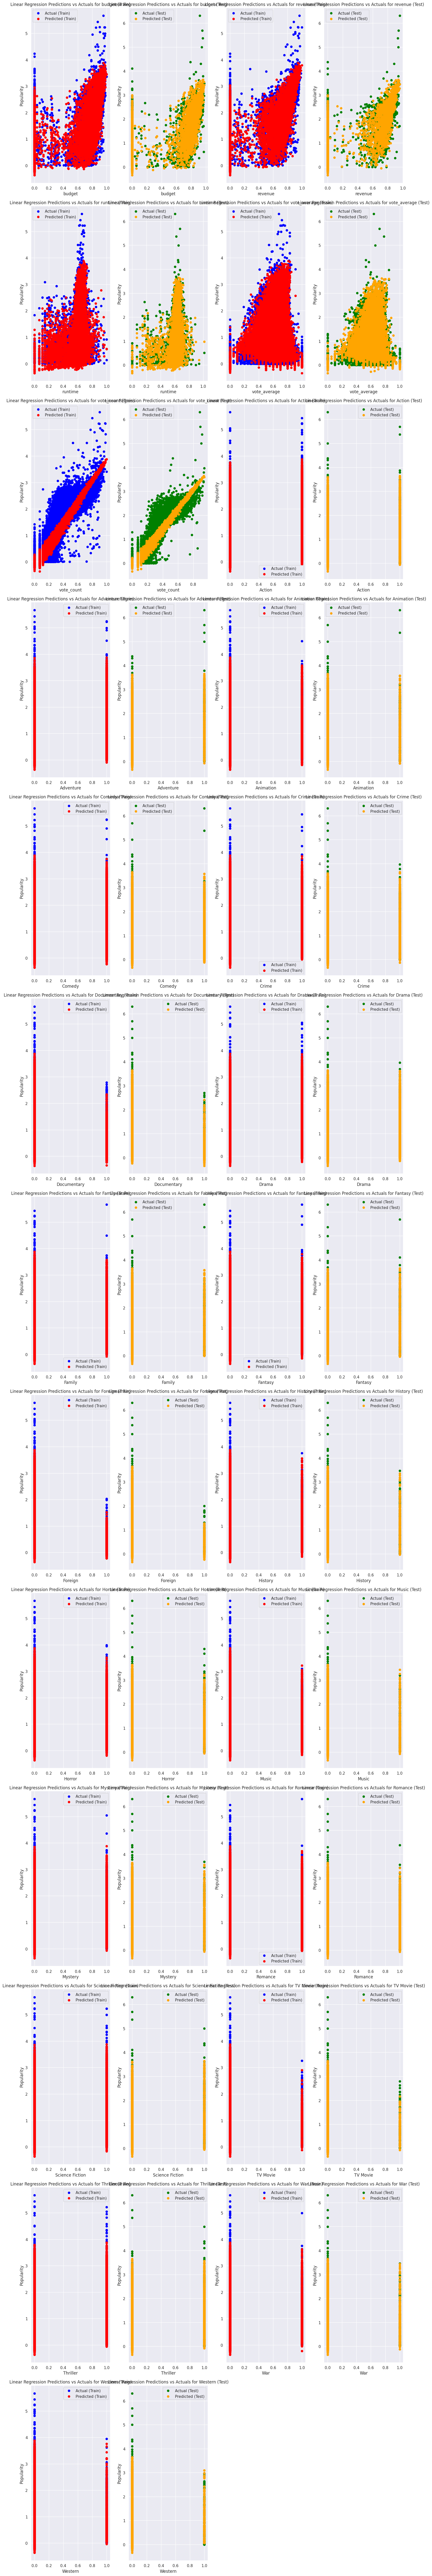

In [ ]:
import math

# Determine the number of rows and columns for the subplot grid
num_variables = len(X_train_scaled.columns)
num_rows = math.ceil(num_variables / 2)
num_cols = min(num_variables, 2)

# Initialize a figure
plt.figure(figsize=(16, 8 * num_rows))

# Iterate over each variable
for i, variable in enumerate(X_train_scaled.columns):

    # Plot for training set predictions
    plt.subplot(num_rows, num_cols * 2, i * 2 + 1)
    plt.scatter(X_train_scaled[variable], y_train, color='blue', label='Actual (Train)')
    plt.scatter(X_train_scaled[variable], mlr_y_train_pred, color='red', label='Predicted (Train)')
    plt.xlabel(variable)
    plt.ylabel('Popularity')
    plt.title(f'Linear Regression Predictions vs Actuals for {variable} (Train)')
    plt.legend()

    # Plot for testing set predictions
    plt.subplot(num_rows, num_cols * 2, i * 2 + 2)
    plt.scatter(X_test_scaled[variable], y_test, color='green', label='Actual (Test)')
    plt.scatter(X_test_scaled[variable], mlr_y_test_pred, color='orange', label='Predicted (Test)')
    plt.xlabel(variable)
    plt.ylabel('Popularity')
    plt.title(f'Linear Regression Predictions vs Actuals for {variable} (Test)')
    plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()

The plots are not linear because they are distorted by other independent variables, different from doing simple linear regression. 

The points scattered further away could be potential outliers. 

#### Without K-Fold Cross-Validation

In [ ]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train_scaled, y_train))
print("Mean Absolute Error (MAE) \t:", mean_absolute_error(y_train, mlr_y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", mean_squared_error(y_train, mlr_y_train_pred, squared=False))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test_scaled, y_test))
print("Mean Absolute Error (MAE) \t:", mean_absolute_error(y_test, mlr_y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", mean_squared_error(y_test, mlr_y_test_pred, squared=False))

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8022049295244966
Mean Absolute Error (MAE) 	: 0.2606132444239512
Root Mean Squared Error (RMSE) 	: 0.3582781389085172

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8025519518943235
Mean Absolute Error (MAE) 	: 0.2596863737972543
Root Mean Squared Error (RMSE) 	: 0.35762633571891533


Without K-Fold Cross-Validation:

With an Explained variation (R^2) of around 0.80 the model demonstrated a decent fit before modifying on both the training and test datasets. Thus, the model explained about 80 percent of the variation in the target variable. 

Next, the average absolute variance between the predicted and actual values was 0.26, according to the Mean Absolute Error (MAE), which was around 0.26. 

Lastly, the average prediction error was 0.36, as indicated by the Root Mean Squared Error (RMSE) of around 0.36.

#### With K-Fold Cross-Validation

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

# Define the number of folds for cross-validation
k = 5 

# Initialize lists to store metrics
r2_scores = []
mae_scores = []
rmse_scores = []

# Initialize KFold cross-validator
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X_combined):
    x_train, x_test = X_combined.iloc[train_index], X_combined.iloc[test_index]
    y_train, y_test = y_combined.iloc[train_index], y_combined.iloc[test_index]
    
    
    # Fit your model
    linreg.fit(x_train, y_train)
    
    # Make predictions
    y_pred = linreg.predict(x_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Append scores to lists
    r2_scores.append(r2)
    mae_scores.append(mae)
    rmse_scores.append(rmse)

# Calculate mean scores
mean_r2 = np.mean(r2_scores)
mean_mae = np.mean(mae_scores)
mean_rmse = np.mean(rmse_scores)

print("Mean R^2 Score:", mean_r2)
print("Mean MAE:", mean_mae)
print("Mean RMSE:", mean_rmse)


Mean R^2 Score: 0.8019385864437931
Mean MAE: 0.26059593812816406
Mean RMSE: 0.3583703207777485


With K-Fold Cross-Validation

With an Explained variation (R^2) of around 0.802, the model demonstrated a decent fit after modifying on both the training and test datasets. Thus, the model explained about 80.2 percent of the variation in the target variable. 

Next, the average absolute variance between the predicted and actual values was 0.26, according to the Mean Absolute Error (MAE), which was around 0.26. 

Lastly, the average prediction error was 0.36, as indicated by the Root Mean Squared Error (RMSE) of around 0.36.

### Model 2: Random Forest Regression

Random Forest Regression is a supervised learning algorithm which can decrease overfitting and increase accuracy. Additionally, it constructs many decision trees during training and averages their forecasts. 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# initialize the data used
X = df2_normalized.drop(columns=['popularity'])
y = df2_normalized['popularity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler on training data
scaler.fit(X_train)

# Convert scaled features array to DataFrame with preserved index
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

# Concatenate X_train_scaled and X_test_scaled for k-Fold Cross-Validation
X_combined = pd.concat([X_train_scaled, X_test_scaled])
y_combined = pd.concat([y_train, y_test])

In [ ]:
# Initalization
rfr = RandomForestRegressor(max_depth=2, random_state=0)

# Train the model
rfr.fit(X_train, y_train)

# Predict all Independent Variables corresponding to Popularity in train set
rfr_y_train_pred = rfr.predict(X_train)

# Predict all Independent Variables corresponding to Popularity in test set
rfr_y_test_pred = rfr.predict(X_test)

#### Without K-Fold Cross-Validation

In [ ]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", rfr.score(X_train, y_train))
print("Mean Absolute Error (MAE) \t:", mean_absolute_error(y_train, rfr_y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", mean_squared_error(y_train, rfr_y_train_pred, squared=False))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", rfr.score(X_test, y_test))
print("Mean Absolute Error (MAE) \t:", mean_absolute_error(y_test, rfr_y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", mean_squared_error(y_test, rfr_y_test_pred, squared=False))

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7772556267814131
Mean Absolute Error (MAE) 	: 0.285436381955302
Root Mean Squared Error (RMSE) 	: 0.38020335840465475

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7775434945092574
Mean Absolute Error (MAE) 	: 0.286226564005704
Root Mean Squared Error (RMSE) 	: 0.3795994948631197


Without K-Fold Cross-Validation:

With an Explained variation (R^2) of around 0.78, the model demonstrated a decent fit before modifying on both the training and test datasets. Thus, the model explained about 78 percent of the variation in the target variable. 

Next, the average absolute variance between the predicted and actual values was 0.29, according to the Mean Absolute Error (MAE), which was around 0.29. 

Lastly, the average prediction error was 0.38, as indicated by the Root Mean Squared Error (RMSE) of around 0.38.

#### With K-Fold Cross-Validation

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

# Define the number of folds for cross-validation
k = 5 

# Initialize lists to store metrics
r2_scores = []
mae_scores = []
rmse_scores = []

# Initialize KFold cross-validator
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X_combined):
    x_train, x_test = X_combined.iloc[train_index], X_combined.iloc[test_index]
    y_train, y_test = y_combined.iloc[train_index], y_combined.iloc[test_index]
    
    
    # Fit your model
    rfr.fit(x_train, y_train)
    
    # Make predictions
    y_pred = rfr.predict(x_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Append scores to lists
    r2_scores.append(r2)
    mae_scores.append(mae)
    rmse_scores.append(rmse)

# Calculate mean scores
mean_r2 = np.mean(r2_scores)
mean_mae = np.mean(mae_scores)
mean_rmse = np.mean(rmse_scores)

print("Mean R^2 Score:", mean_r2)
print("Mean MAE:", mean_mae)
print("Mean RMSE:", mean_rmse)


Mean R^2 Score: 0.7744644787472172
Mean MAE: 0.2874623109473925
Mean RMSE: 0.38243877147846916


With K-Fold Cross-Validation

With an Explained variation (R^2) of around 0.77, the model demonstrated a decent fit after modifying on both the training and test datasets. Thus, the model explained about 77 percent of the variation in the target variable. 

Next, the average absolute variance between the predicted and actual values was 0.29, according to the Mean Absolute Error (MAE), which was around 0.29. 

Lastly, the average prediction error was 0.38, as indicated by the Root Mean Squared Error (RMSE) of around 0.38.

### Model 3: Gradient Boosting Regression

Gradient Boosting Regressor is an ensemble machine learning algorithm that builds a sequence of decision trees, where each tree corrects the errors of the previous one, to predict continuous target variables.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# initialize the data used
X = df2_normalized.drop(columns=['popularity'])
y = df2_normalized['popularity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler on training data
scaler.fit(X_train)

# Convert scaled features array to DataFrame with preserved index
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

# Concatenate X_train_scaled and X_test_scaled for k-Fold Cross-Validation
X_combined = pd.concat([X_train_scaled, X_test_scaled])
y_combined = pd.concat([y_train, y_test])

In [ ]:
# initialize model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# train the model
gbr.fit(X_train_scaled, y_train)

# Predict all Independent Variables corresponding to Popularity in train set
gbr_y_train_pred = gbr.predict(X_train_scaled)

# Predict all Independent Variables corresponding to Popularity in test set
gbr_y_test_pred = gbr.predict(X_test_scaled)

#### Without K-Fold Cross-Validation

In [ ]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", gbr.score(X_train_scaled, y_train))
print("Mean Absolute Error (MAE) \t:", mean_absolute_error(y_train, gbr_y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", mean_squared_error(y_train, gbr_y_train_pred, squared=False))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", gbr.score(X_test_scaled, y_test))
print("Mean Absolute Error (MAE) \t:", mean_absolute_error(y_test, gbr_y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", mean_squared_error(y_test, gbr_y_test_pred, squared=False))

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8331344746866008
Mean Absolute Error (MAE) 	: 0.24142083787936142
Root Mean Squared Error (RMSE) 	: 0.32907575601920613

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8279894345656608
Mean Absolute Error (MAE) 	: 0.24366883342168938
Root Mean Squared Error (RMSE) 	: 0.33379561888897397


Without K-Fold Cross-Validation:

With an Explained variation (R^2) of around 0.83, the model demonstrated a good fit before modifying on both the training and test datasets. Thus, the model explained about 83 percent of the variation in the target variable. 

Next, the average absolute variance between the predicted and actual values was 0.24, according to the Mean Absolute Error (MAE), which was around 0.24. 

Lastly, the average prediction error was 0.33, as indicated by the Root Mean Squared Error (RMSE) of around 0.33.

#### With K-Fold Cross-Validation

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

# Define the number of folds for cross-validation
k = 5  

# Initialize lists to store metrics
r2_scores = []
mae_scores = []
rmse_scores = []

# Initialize KFold cross-validator
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X_combined):
    x_train, x_test = X_combined.iloc[train_index], X_combined.iloc[test_index]
    y_train, y_test = y_combined.iloc[train_index], y_combined.iloc[test_index]
    
    
    # Fit your model
    gbr.fit(x_train, y_train)
    
    # Make predictions
    y_pred = gbr.predict(x_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Append scores to lists
    r2_scores.append(r2)
    mae_scores.append(mae)
    rmse_scores.append(rmse)

# Calculate mean scores
mean_r2 = np.mean(r2_scores)
mean_mae = np.mean(mae_scores)
mean_rmse = np.mean(rmse_scores)

print("Mean R^2 Score:", mean_r2)
print("Mean MAE:", mean_mae)
print("Mean RMSE:", mean_rmse)


Mean R^2 Score: 0.8280316049604641
Mean MAE: 0.24391768908004874
Mean RMSE: 0.33393308626188495


With K-Fold Cross-Validation:

With an Explained variation (R^2) of around 0.83, the model demonstrated a good fit after modifying on both the training and test datasets. Thus, the model explained about 83 percent of the variation in the target variable. 

Next, the average absolute variance between the predicted and actual values was 0.24, according to the Mean Absolute Error (MAE), which was around 0.24. 

Lastly, the average prediction error was 0.33, as indicated by the Root Mean Squared Error (RMSE) of around 0.33.

## Model Comparison

### Without K-Fold Cross Validation

#### Train Set

<table>
  <thead>
    <tr>
      <th></th>
      <th>Multiple Linear Regression (MLR)</th>
      <th>Random Forest Regression (RFR)</th>
      <th>Gradient Boosting Regression (GBR)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>R^2</td>
      <td>0.8022</td>
      <td>0.7772</td>
      <td>0.8331</td>
    </tr>
    <tr>
      <td>MAE</td>
      <td>0.2606</td>
      <td>0.2854</td>
      <td>0.2414</td>
    </tr>
    <tr>
      <td>RMSE</td>
      <td>0.3583</td>
      <td>0.3802</td>
      <td>0.3291</td>
    </tr>
  </tbody>
</table>

#### Test Set

<table>
  <thead>
    <tr>
      <th></th>
      <th>Multiple Linear Regression (MLR)</th>
      <th>Random Forest Regression (RFR)</th>
      <th>Gradient Boosting Regression (GBR)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>R^2</td>
      <td>0.8026</td>
      <td>0.7775</td>
      <td>0.8280</td>
    </tr>
    <tr>
      <td>MAE</td>
      <td>0.2597</td>
      <td>0.2862</td>
      <td>0.2437</td>
    </tr>
    <tr>
      <td>RMSE</td>
      <td>0.3576</td>
      <td>0.3796</td>
      <td>0.3338</td>
    </tr>
  </tbody>
</table>

### With K-Fold Cross Validation

<table>
  <thead>
    <tr>
      <th></th>
      <th>Multiple Linear Regression (MLR)</th>
      <th>Random Forest Regression (RFR)</th>
      <th>Gradient Boosting Regression (GBR)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>R^2</td>
      <td>0.8019</td>
      <td>0.7745</td>
      <td>0.8280</td>
    </tr>
    <tr>
      <td>MAE</td>
      <td>0.2606</td>
      <td>0.2875</td>
      <td>0.2439</td>
    </tr>
    <tr>
      <td>RMSE</td>
      <td>0.3584</td>
      <td>0.3824</td>
      <td>0.3339</td>
    </tr>
  </tbody>
</table>

Best model: Gradient Boosting Regression (GBR)
- highest R^2 (0.83>0.80, 0.83>0.77)
- lowest MAE (0.24<0.26, 0.24<0.29)
- lowest RMSE (0.33<0.36, 0.33<0.38)
in both Manual Calculation of Metrics and in K-Fold Cross-Validation. 

## Post-Model Outlier Removal

Let's try to remove outliers and see if we can increase the accuracy of our best model, ie. increase R^2 value

In [ ]:
df3 = df2_normalized.copy()

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df3['popularity'].quantile(0.25)
Q3 = df3['popularity'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df3[(df3['popularity'] < lower_bound) | (df3['popularity'] > upper_bound)]

# Remove outliers
df3_cleaned = df3[(df3['popularity'] >= lower_bound) & (df3['popularity'] <= upper_bound)]

Now 'df3_cleaned' contains the DataFrame with outliers removed

In [ ]:
# Scale the data again
cleaned_X = df3_cleaned.drop(columns=['popularity'])
cleaned_y = df3_cleaned['popularity']

# Split data into training and testing sets
cleaned_X_train, cleaned_X_test, cleaned_y_train, cleaned_y_test = train_test_split(cleaned_X, cleaned_y, test_size=0.2, random_state=42)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler on training data
scaler.fit(cleaned_X_train)

# Convert scaled features array to DataFrame with preserved index
cleaned_X_train_scaled = pd.DataFrame(scaler.transform(cleaned_X_train), index=cleaned_X_train.index, columns=cleaned_X_train.columns)
cleaned_X_test_scaled = pd.DataFrame(scaler.transform(cleaned_X_test), index=cleaned_X_test.index, columns=cleaned_X_test.columns)

# Concatenate X_train_scaled and X_test_scaled for k-Fold Cross-Validation
cleaned_X_combined = pd.concat([cleaned_X_train_scaled, cleaned_X_test_scaled])
cleaned_y_combined = pd.concat([cleaned_y_train, cleaned_y_test])

### Visualization with MLR

Let's use MLR to understand how the removal of outliers affect the scatterplot of each Independent Variable with Popularity as MLR offer better interpretability. As interpretability is crucial for our analysis, we will interpret the plots of MLR without outliers compared to with outliers to understand the differences.

In [ ]:
# create the linear regression object
linreg = LinearRegression() 

# train the linear regression model
linreg.fit(cleaned_X_train_scaled, cleaned_y_train)    
    
# Predict all Independent Variables corresponding to Popularity in train set
mlr_y_train_pred = linreg.predict(cleaned_X_train_scaled)

# Predict all Independent Variables corresponding to Popularity in test set
mlr_y_test_pred = linreg.predict(cleaned_X_test_scaled)

In [ ]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(cleaned_X_train_scaled, cleaned_y_train))
print("Mean Absolute Error (MAE) \t:", mean_absolute_error(cleaned_y_train, mlr_y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", mean_squared_error(cleaned_y_train, mlr_y_train_pred, squared=False))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(cleaned_X_test_scaled, cleaned_y_test))
print("Mean Absolute Error (MAE) \t:", mean_absolute_error(cleaned_y_test, mlr_y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", mean_squared_error(cleaned_y_test, mlr_y_test_pred, squared=False))

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7989142532879691
Mean Absolute Error (MAE) 	: 0.2590414505039001
Root Mean Squared Error (RMSE) 	: 0.3549428482603054

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8061695159307349
Mean Absolute Error (MAE) 	: 0.25810495613563367
Root Mean Squared Error (RMSE) 	: 0.35029394998625835


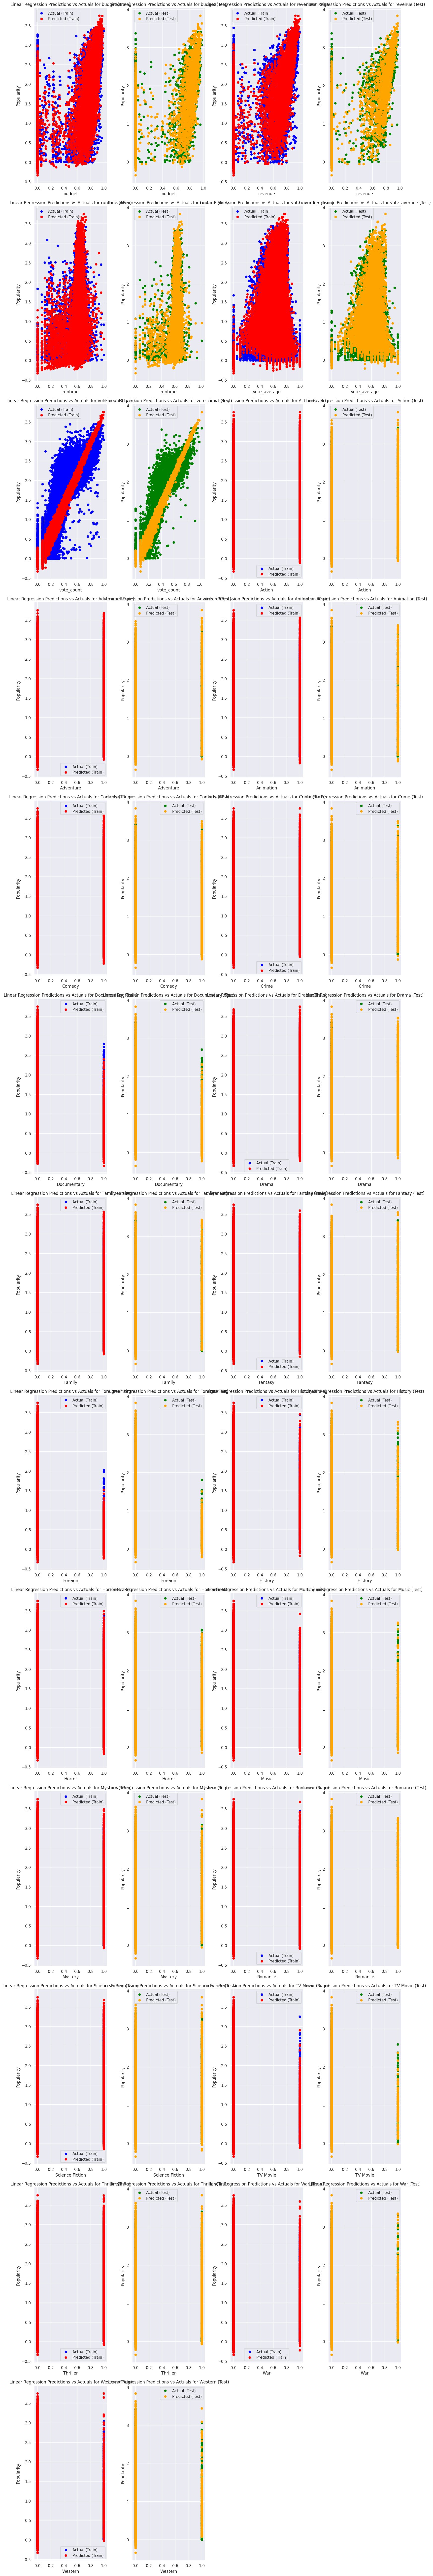

In [ ]:
# Determine the number of rows and columns for the subplot grid
num_variables = len(cleaned_X_train_scaled.columns)
num_rows = math.ceil(num_variables / 2)
num_cols = min(num_variables, 2)

# Initialize a figure
plt.figure(figsize=(16, 8 * num_rows))

# Iterate over each variable
for i, variable in enumerate(cleaned_X_train_scaled.columns):

    # Plot for training set predictions
    plt.subplot(num_rows, num_cols * 2, i * 2 + 1)
    plt.scatter(cleaned_X_train_scaled[variable], cleaned_y_train, color='blue', label='Actual (Train)')
    plt.scatter(cleaned_X_train_scaled[variable], mlr_y_train_pred, color='red', label='Predicted (Train)')
    plt.xlabel(variable)
    plt.ylabel('Popularity')
    plt.title(f'Linear Regression Predictions vs Actuals for {variable} (Train)')
    plt.legend()

    # Plot for testing set predictions
    plt.subplot(num_rows, num_cols * 2, i * 2 + 2)
    plt.scatter(cleaned_X_test_scaled[variable], cleaned_y_test, color='green', label='Actual (Test)')
    plt.scatter(cleaned_X_test_scaled[variable], mlr_y_test_pred, color='orange', label='Predicted (Test)')
    plt.xlabel(variable)
    plt.ylabel('Popularity')
    plt.title(f'Linear Regression Predictions vs Actuals for {variable} (Test)')
    plt.legend()

# Adjust the layout
plt.tight_layout()
plt.show()

Before outliers are removed, the model is less likely to predict values accurately, leading to higher errors and reduced performance. After removing outliers and re-running the MLR model, there are fewer or no points in the regions previously occupied by potential outliers. This illustrates a more concentrated distribution of data points between the predictions and the actual values, leading to enhanced accuracy and reliability in our predictive modeling.

### Rebuilding GBR model

We carry out the Gradient Boosting Regression again to see if the accuracy could be improved. 

In [ ]:
# Initialize model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# Train the model
gbr.fit(cleaned_X_train_scaled, cleaned_y_train)

# Predict all Independent Variables corresponding to Popularity in train set
cleaned_gbr_y_train_pred = gbr.predict(cleaned_X_train_scaled)

# Predict all Independent Variables corresponding to Popularity in test set
cleaned_gbr_y_test_pred = gbr.predict(cleaned_X_test_scaled)

### Without K-Fold Cross-Validation

In [ ]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", gbr.score(cleaned_X_train_scaled, cleaned_y_train))
print("Mean Absolute Error (MAE) \t:", mean_absolute_error(cleaned_y_train, cleaned_gbr_y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", mean_squared_error(cleaned_y_train, cleaned_gbr_y_train_pred, squared=False))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", gbr.score(cleaned_X_test_scaled, cleaned_y_test))
print("Mean Absolute Error (MAE) \t:", mean_absolute_error(cleaned_y_test, cleaned_gbr_y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", mean_squared_error(cleaned_y_test, cleaned_gbr_y_test_pred, squared=False))

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8312891587589326
Mean Absolute Error (MAE) 	: 0.23981617471647637
Root Mean Squared Error (RMSE) 	: 0.3251167024495956

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8353722445189184
Mean Absolute Error (MAE) 	: 0.2381282163381013
Root Mean Squared Error (RMSE) 	: 0.3228294341879077


### With K-Fold Cross-Validation

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

# Define the number of folds for cross-validation
k = 5 

# Initialize lists to store metrics
r2_scores = []
mae_scores = []
rmse_scores = []

# Initialize k-fold cross-validator
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
for train_index, test_index in kf.split(cleaned_X_combined):
    x_train, x_test = cleaned_X_combined.iloc[train_index], cleaned_X_combined.iloc[test_index]
    y_train, y_test = cleaned_y_combined.iloc[train_index], cleaned_y_combined.iloc[test_index]
    
    
    # Fit your model
    gbr.fit(x_train, y_train)
    
    # Make predictions
    y_pred = gbr.predict(x_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Append scores to lists
    r2_scores.append(r2)
    mae_scores.append(mae)
    rmse_scores.append(rmse)

# Calculate mean scores
mean_r2 = np.mean(r2_scores)
mean_mae = np.mean(mae_scores)
mean_rmse = np.mean(rmse_scores)

print("Mean R^2 Score:", mean_r2)
print("Mean MAE:", mean_mae)
print("Mean RMSE:", mean_rmse)

Mean R^2 Score: 0.8287758452339806
Mean MAE: 0.2415117897432449
Mean RMSE: 0.32775120987620254


While GBR may provide better accuracy, MLR may offer better interpretability. If interpretability is crucial for the analysis, we can still interpret the coefficients of MLR to understand the relationships between predictors and the target variable.

### Results after removing outliers

#### Without K-Fold Cross-Validation

<table>
  <thead>
    <tr>
      <th></th>
      <th>Before removing outliers</th>
      <th>After removing outliers</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>R^2</td>
      <td>0.8279</td>
      <td>0.8354</td>
    </tr>
    <tr>
      <td>MAE</td>
      <td>0.2437</td>
      <td>0.2381</td>
    </tr>
    <tr>
      <td>RMSE</td>
      <td>0.3338</td>
      <td>0.3228</td>
    </tr>
  </tbody>
</table>

#### With K-Fold Cross-Validation

<table>
  <thead>
    <tr>
      <th></th>
      <th>Before removing outliers</th>
      <th>After removing outliers</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>R^2</td>
      <td>0.8280</td>
      <td>0.8288</td>
    </tr>
    <tr>
      <td>MAE</td>
      <td>0.2439</td>
      <td>0.2415</td>
    </tr>
    <tr>
      <td>RMSE</td>
      <td>0.3340</td>
      <td>0.3277</td>
    </tr>
  </tbody>
</table>

Generally, the R^2 increases and the MAE and RMSE decrease, showing that removing of outliers help in improving prediction accuracy. 

### Feature Importance

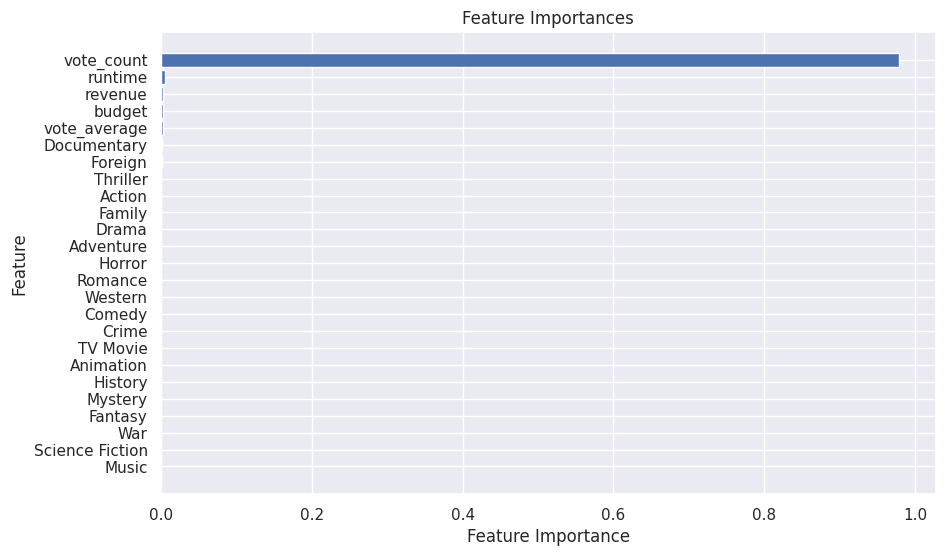

In [ ]:
# Get list of variable names
feature_names = cleaned_X_train_scaled.columns.tolist()

# Get feature importances
feature_importances = gbr.feature_importances_

# Sort feature importances in descending order
indices = feature_importances.argsort()

# Plot feature importances as horizontal bar chart
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(feature_names)), feature_importances[indices], align='center')
plt.yticks(range(len(feature_names)), [feature_names[i] for i in indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

Based on the feature importance bar plot, the top 5 features contributing to a movie's popularity are vote_count, runtime, revenue, budget and vote_average. Among these, the vote_count stands out as the most cruciual feature, with a magnitude close to 1. Conversely, the remaining features exhibit magnitudes close to 0, suggesting relatively lesser impact.

However, accessing the importance of genres in predicting popularity is challenging due to their proportionate effect on the vote_count. Therefore, we have zoomed in on the top 5 feature importances to explore other influential factors, specifically genres.

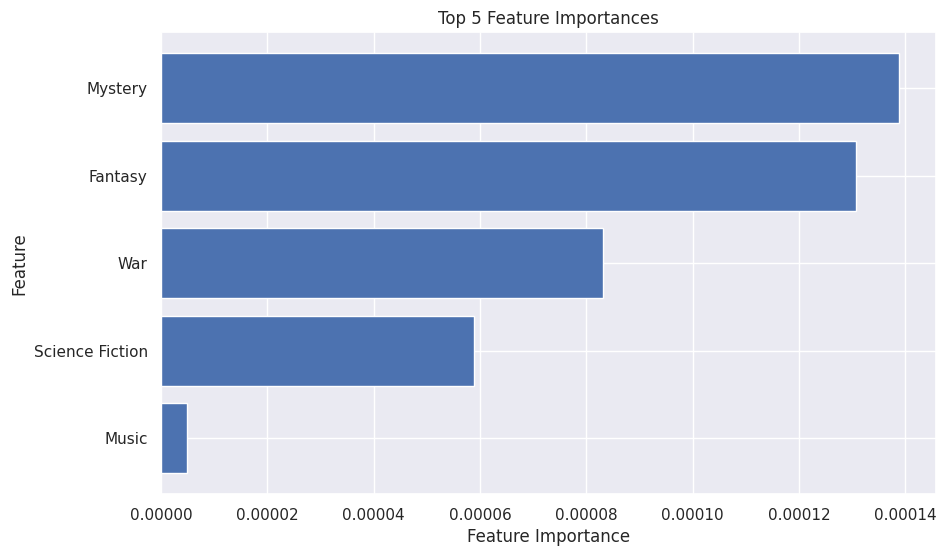

In [ ]:
# Plot top 5 feature importances
plt.figure(figsize=(10, 6))
plt.title("Top 5 Feature Importances")
plt.barh(range(5), feature_importances[indices][:5], align='center')
plt.yticks(range(5), [feature_names[i] for i in indices][:5])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

The top 5 genres most capable of predicting popularity, in descending order, are Mystery, Fantasy, War, Science Fiction, and Music. Surprisingly, none of the more prevalent genres, which constitute the majority of the movie dataset, are represented here. This observation underscores the need for a nuanced understanding of genre dynamics in shaping audience preferences and movie popularity.

# Conclusion

To predict movie popularity, we explored 3 different models, Multiple Linear Regression (MLR), Random Forest Regressor (RFR) and Gradient Boosting Regressor (GBR). Ultimately, we found that GBR yield the most accurate results and continued to fine-tune it by removing outliers as explored in the data visualization stage. Finally, through feature engineering, we uncovered the genres that exert the most influence on a movie's popularity.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8173098b-aa35-4b9e-8ef5-d771d185d14f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>